# Postać modelu opisująca zjawisko transportu ciepła
$$ \ T_m (z,t) = T_p +exp(\frac{V\cdot z}{2\cdot D})\cdot\int_0^t K_v(t-\tau)\cdot f(\tau) d\tau $$
$$\ K_v(t)=\frac{z}{2\cdot (\pi \cdot t^3 \cdot D)^{0.5}} \cdot exp (- \frac{z^2}{4\cdot D\cdot t}-\frac {V^2}{4 \cdot D} \cdot t) $$
$$\ t \in (0,t_r) -\text{czas} $$
$$\ t_r - \text{czas obserwacji procesu} $$
$$\ T_p - \text{temperatura poczatkowa} $$
$$\ f(t) = k\cdot \delta (t) - \text{wymuszenie w postaci krótkiego impulsu o amplitudzie k}$$
$$\ V - \text{prędkość przepływu flotowanej substancji} $$
$$\ D - \text{współczynnik dyfuzji ciepła} $$

### Importowanie potrzebnych bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
my_data = pd.read_csv(r"C:\Users\margo\Dysk Google\Semestr_6\MIS\Projekt\OBIEKT.DAT",
    sep='\s+',names=['Time','Temperature'])
my_data.head()

,Time,Temperature
0,4.0,0.022222
1,8.0,0.016667
2,12.0,0.021111
3,16.0,0.016667
4,20.0,0.020000


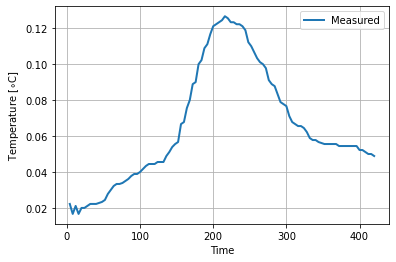

<Figure size 432x288 with 0 Axes>

In [3]:
%matplotlib inline

plt.plot(my_data['Time'],my_data['Temperature'],linewidth=2,label='Measured')
plt.xlabel('Time')
plt.ylabel('Temperature [$\circ$C]')
plt.grid()
plt.legend()
plt.show()
plt.tight_layout()

In [4]:
def temperature(t,z,Tp,V,D):
    return Tp+np.exp((V*z)/(2*D))*(z/(2*(np.pi*D*t**3)**0.5))*np.exp((-z**2/(4*D*t))-(t*V**2/(4*D)))

  

In [38]:
# !pip install lmfit

  Created wheel for lmfit: filename=lmfit-1.0.2-py3-none-any.whl size=85278 sha256=4f95d247cee6c91082839177cf02927eaa7968bc3fdfeb68ca594a6b3a5c86f4
  Stored in directory: c:\users\margo\appdata\local\pip\cache\wheels\2c\17\f4\1ec5177c8589e18c329907db7db4f1c4524bb73251d34f3622
  Created wheel for asteval: filename=asteval-0.9.23-py3-none-any.whl size=17436 sha256=f7b7640b81a8dccfa7967e1bc199a46e456c04f3a413d9d694061b1ffeeaa731
  Stored in directory: c:\users\margo\appdata\local\pip\cache\wheels\2f\3c\df\1c0eafdd1d6ff5b36e3a0030eaab4d8465f8f94ae9c2b74d39
Successfully built lmfit asteval


[20.          0.51623977  0.1         0.1       ]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


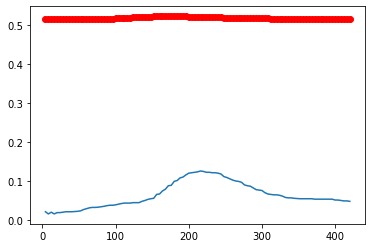

In [57]:
from scipy.optimize import curve_fit, leastsq
from scipy.special import expit
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit


g = np.array([20,0.001,0.1,0.1])

t = my_data['Time'].values
t = expit(t)

temp = my_data['Temperature'].values
temp = expit(temp)

c,cov = curve_fit(temperature,t,temp,g)


print(c)


n = len(my_data['Time'])
y = np.empty(n)
for i in range(n):
    y[i] = temperature(my_data['Time'][i],c[0],c[1],c[2],c[3])

%matplotlib inline
plt.plot(my_data['Time'],my_data['Temperature'])
plt.plot(my_data['Time'],y,'ro')

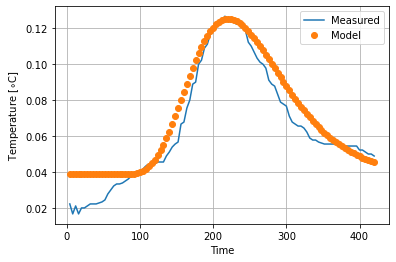

In [32]:
g = [20,0.0027,0.08,0.067]
k = 14.3
n = len(my_data['Time'])
y = np.empty(n)
for i in range(n):
    y[i] = k*temperature(my_data['Time'][i],g[0],g[1],g[2],g[3])

%matplotlib inline
plt.plot(my_data['Time'],my_data['Temperature'],label='Measured')
plt.plot(my_data['Time'],y,'o',label='Model')
plt.xlabel('Time')
plt.ylabel('Temperature [$\circ$C]')
plt.grid()
plt.legend()